In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
salary_data=pd.read_csv("Salary_Data.csv")

In [3]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# splitting data into test and train

In [4]:
salary_data_test=salary_data.iloc[27:,:]

In [5]:
salary_data_test

,YearsExperience,Salary
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
salary_data_test=salary_data_test.reset_index(drop=True)

In [7]:
salary_data_test

,YearsExperience,Salary
0,9.6,112635.0
1,10.3,122391.0
2,10.5,121872.0


In [8]:
salary_data_train=salary_data.iloc[:27,:]

In [9]:
salary_data_train

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [10]:
salary_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  27 non-null     float64
 1   Salary           27 non-null     float64
dtypes: float64(2)
memory usage: 560.0 bytes


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

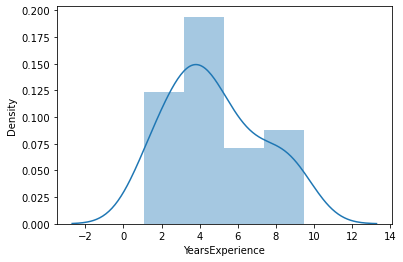

In [11]:
sns.distplot(salary_data_train["YearsExperience"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

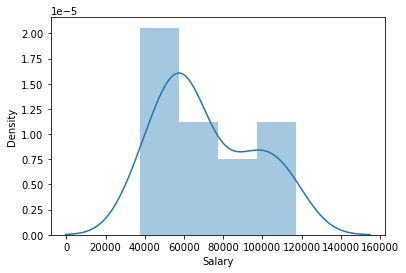

In [12]:
sns.distplot(salary_data_train["Salary"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

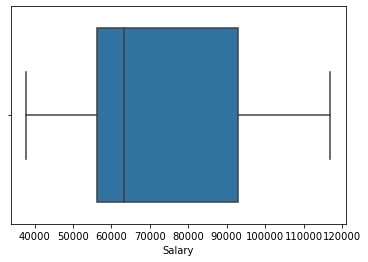

In [13]:
sns.boxplot(salary_data_train["Salary"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

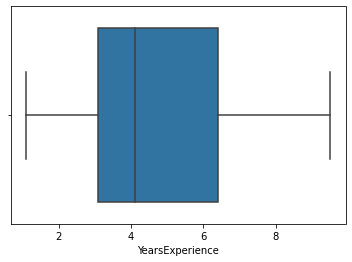

In [14]:
sns.boxplot(salary_data_train["YearsExperience"])

In [15]:
pd.get_dummies(salary_data_train)==True

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [16]:
salary_data_train.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.970699
Salary,0.970699,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

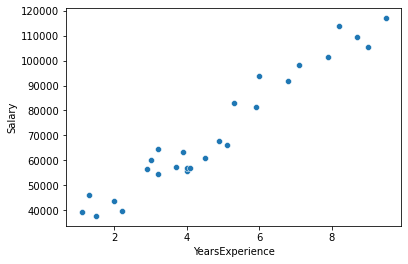

In [17]:
sns.scatterplot(x=salary_data_train["YearsExperience"], y=salary_data_train["Salary"], data=salary_data_train)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

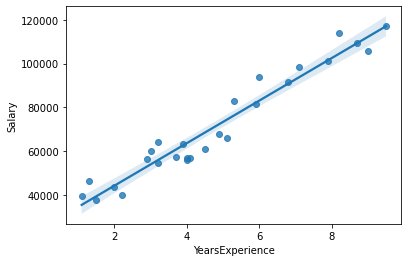

In [18]:
sns.regplot(x=salary_data_train["YearsExperience"],y=salary_data_train["Salary"])

# model building

In [19]:
model=smf.ols("Salary~YearsExperience",data=salary_data_train).fit()

In [20]:
model.params

Intercept          24828.690150
YearsExperience     9711.762527
dtype: float64

In [21]:
model.tvalues

Intercept           9.656712
YearsExperience    20.197624
dtype: float64

In [22]:
model.pvalues

Intercept          6.458412e-10
YearsExperience    5.363111e-17
dtype: float64

In [23]:
model.rsquared

0.9422558112162985

In [24]:
model.rsquared_adj

0.9399460436649505

In [25]:
model.predict(salary_data_test["YearsExperience"])

0    118061.610407
1    124859.844176
2    126802.196681
dtype: float64

# testing 

In [26]:
salary_data_test

,YearsExperience,Salary
0,9.6,112635.0
1,10.3,122391.0
2,10.5,121872.0


In [27]:
salary_data_test["Predicted_Salary"]=model.predict(salary_data_test["YearsExperience"])

In [28]:
salary_data_test["Predicted_Salary"]=salary_data_test.Predicted_Salary.round()

In [29]:
salary_data_test

,YearsExperience,Salary,Predicted_Salary
0,9.6,112635.0,118062.0
1,10.3,122391.0,124860.0
2,10.5,121872.0,126802.0


In [30]:
salary_data_test["error"]=salary_data_test["Salary"]-salary_data_test["Predicted_Salary"]

In [31]:
salary_data_test

,YearsExperience,Salary,Predicted_Salary,error
0,9.6,112635.0,118062.0,-5427.0
1,10.3,122391.0,124860.0,-2469.0
2,10.5,121872.0,126802.0,-4930.0
